In [1]:
import astropy.io.votable as votab
import astropy.units as u
import astropy.table as tabl
import astropy.constants as c
import astropy.io.votable as votab
import astropy.io.ascii 
import astropy.units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib as mpl
import os
#import poppy
import numpy as np
#from utils import parse_table

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
home=os.path.expanduser("~/")

In [2]:
mpl.__version__

'3.7.1'

In [3]:


exoarch_mission = "http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=missionstars&format=votable&select=*"
exoarch_exocat = "http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=mission_exocat&format=votable&select=*"


#if you need to update votable:
#mission_stars_file=astropy.utils.data.download_file(exoarch_mission, 
#                                                        cache=False,
#                                                        show_progress=True,
#                                                        timeout=10) #regular call was timing out
#exocat_stars_file=astropy.utils.data.download_file(exoarch_exocat, 
#                                                        cache=False,
#                                                        show_progress=True,
#                                                        timeout=10) #regular call was timing out

#exocat_stars = votab.parse(exocat_stars_file,
#datatype_mapping={"char": "unicodeChar"}).get_first_table().to_table()
#mission_stars = votab.parse(mission_stars_file,
#datatype_mapping={"char": "unicodeChar"}).get_first_table().to_table()#exocat_stars.write("exocat_stars.votable",format="votable")
#mission_stars.write("data/mission_stars.votable",format="votable")
#exocat_stars.write("data/exocat_stars.votable",format="votable")


mission_stars = votab.parse("data/mission_stars.votable",
                            datatype_mapping={"char": "unicodeChar"}).get_first_table().to_table()

exocat_stars = votab.parse("data/exocat_stars.votable",
                           datatype_mapping={"char": "unicodeChar"}).get_first_table().to_table()

exocat_stars



hip_name,hd_name,gj_name,tm_name,st_exocatflag,st_coronagflag,st_starshadeflag,st_wfirstflag,st_rvflag,st_lbtiflag,st_probeflag,st_k2flag,st_k2campaign,st_ppnum,wds_designation,wds_sep,wds_deltamag,ra,raerr,rastr,dec,decerr,decstr,st_glon,st_glonerr,st_glat,st_glaterr,st_fracplxunc,st_dist,st_disterr1,st_disterr2,st_pmra,st_pmraerr,st_pmdec,st_pmdecerr,st_vmag,st_vmagerr,st_vmagsrc,st_kmagsrc,st_bmv,st_bmverr,st_bmvsrc,st_vmk,st_vmkerr,st_vmksrc,st_spttype,st_lumclass,st_spttag,st_mbol,st_mbolerr,st_mbolsrc,st_mbolflag,st_lbol,st_lbolerr,st_lbolsrc,st_teff,st_tefferr,st_teffsrc,st_logg,st_loggerr,st_loggsrc,st_metfe,st_metfeerr,st_metfesrc,st_metratio,st_rad,st_raderr,st_radsrc,st_mass,st_masserr,st_masssrc,st_age,st_ageerr,st_agesrc,st_actclass,st_eeidau,st_eeidauerr,st_eeidmas,st_eeidmaserr,st_fpbearth,st_fpbeartherr,st_vmagearth,st_vmageartherr,st_nts,st_nplc,st_nglc,st_nrvc,st_naxa,st_nimg,st_nspec,st_j2m,st_j2merr,st_j2mlim,st_h2m,st_h2merr,st_h2mlim,st_ks2m,st_ks2merr,st_ks2mlim,st_wise1,st_wise1err,st_wise1lim,st_wise2,st_wise2err,st_wise2lim,st_wise3,st_wise3err,st_wise3lim,st_wise4,st_wise4err,st_wise4lim,star_name,id
,,,,,,,,,,,,,,,arcsec,mags,deg,degrees,,deg,degrees,,degrees,degrees,degrees,degrees,,pc,pc,pc,mas / yr,mas / yr,mas / yr,mas / yr,mags,mags,,,mags,mags,,mags,mags,,,,,mags,mags,,,Lsun,Lsun,,K,K,,cm/s**2,cm/s**2,,dex,dex,,,Rsun,Rsun,,Msun,Msun,,Gyr,Gyr,,,AU,AU,mas,mas,,,mag,mag,,,,,,,,mags,mags,,mags,mags,,mags,mags,,mags,mags,,mags,mags,,mags,mags,,mags,mags,,,
object,object,object,object,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,object,float64,float64,float64,float64,object,float64,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,object,float64,float64,object,object,object,object,float64,float64,object,int32,float64,float64,object,float64,float64,object,float64,float64,object,float64,float64,object,object,float64,float64,object,float64,float64,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,object,object
HIP 3185,HD 3795,GJ 27.2,2MASS J00403279-2348172,1,0,0,0,0,0,0,0,--,0,,--,--,10.135,--,00h40m32.40s,-23.804,--,-23d48m14.4s,85.837351,--,-85.86506,--,0.01,28.89,0.29,-0.29,635.5,--,-363.3,--,6.14,0.01,G,,0.72,0.01,G,--,--,,G3/5V,MAINSEQ,G,3.84,0.04,,0,2.76,0.11,B-V,5369.0,--,2005ApJS..159..141V,4.06,--,2007ApJS..168..297T,-0.58,--,,[Fe/H],1.9,--,2007ApJS..168..297T,1.46,--,2007ApJS..168..297T,11.6,--,2007ApJS..168..297T,VI,1.66,--,57.55,--,0.0,--,32.09,--,1,0,1,0,0,1,2,5.13,0.288,0,4.545,0.214,0,4.333,0.02,0,--,--,--,--,--,--,--,--,--,--,--,--,HIP 3185,0
HIP 3203 A,HD 3821,GJ 9020 A,2MASS J00404747-0713574,1,0,0,0,0,0,0,0,--,0,00408-0714,--,--,10.198,--,00h40m47.48s,-7.232,--,-07d13m56.6s,115.211641,--,-69.944399,--,0.02,26.5,0.54,-0.52,0.6,--,-91.6,--,7.02,0.01,G,2MASS,0.62,0.02,G,1.5,0.03,,G2/3V,MAINSEQ,G,4.9,0.05,,1,0.98,0.06,V-K,5828.0,--,2005ApJS..159..141V,4.51,--,2007ApJS..168..297T,-0.06,--,,[Fe/H],0.95,--,2007ApJS..168..297T,1.01,--,2007ApJS..168..297T,5.0,--,2005ApJS..159..141V,A,0.99,--,37.3,--,0.0,--,31.84,--,1,0,1,0,0,1,0,5.911,0.019,0,5.604,0.038,0,5.522,0.026,0,--,--,--,--,--,--,--,--,--,--,--,--,HIP 3203 A,1
HIP 3206,HD 3765,GJ 28,2MASS J00404929+4011133,1,0,0,0,0,0,0,0,--,0,,--,--,10.204,--,00h40m49.00s,40.189,--,+40d11m19.7s,120.734384,--,-22.637565,--,0.01,17.33,0.18,-0.17,355.7,--,-668.9,--,7.36,0.01,G,2MASS,0.94,0.02,G,2.2,0.02,,K2V,MAINSEQ,K,6.17,0.04,,0,0.37,0.05,V-K,5032.0,--,2005ApJS..159..141V,4.58,--,2007ApJS..168..297T,0.18,--,,[Fe/H],0.79,--,2007ApJS..168..297T,0.85,--,2007ApJS..168..297T,2.0,--,2007ApJS..168..297T,VI,0.61,--,35.18,--,0.0,--,31.13,--,1,0,1,0,0,2,6,5.694,0.024,0,5.272,0.051,0,5.164,0

In [4]:
exoarch_mission = "http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=missionstars&format=votable&select=*"

exoarch_missionraw = astropy.utils.data.download_file(exoarch_mission, 
                                                        cache=False,
                                                        show_progress=True,
                                                        timeout=10)
exoarch_mission = votab.parse(exoarch_missionraw,datatype_mapping={"char": "unicodeChar"}).get_first_table().to_table()

In [5]:
mags=np.arange(0,50)

import pandas as pd
#http://www.recons.org/TOP100.posted.htm (converted to CSV with LibreOffice)
recons2012=pd.read_csv('data/recons2012.csv',header=0,
                       comment="#",
                       skiprows=[1,2,3,4,5],
                       skipfooter=100,na_values=["_________"])#, delimiter="  ")



/var/folders/xh/7td0g7f54j7cfsb7f561s_4h0000gn/T/ipykernel_98258/3962377802.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  recons2012=pd.read_csv('data/recons2012.csv',header=0,


In [6]:


p=0.2/np.pi#Robinson 2014
rp=1*u.R_earth
a=1*u.astronomical_unit
C_earth=p*(rp/a)**2
C_earth.decompose()



<Quantity 1.15720938e-10>

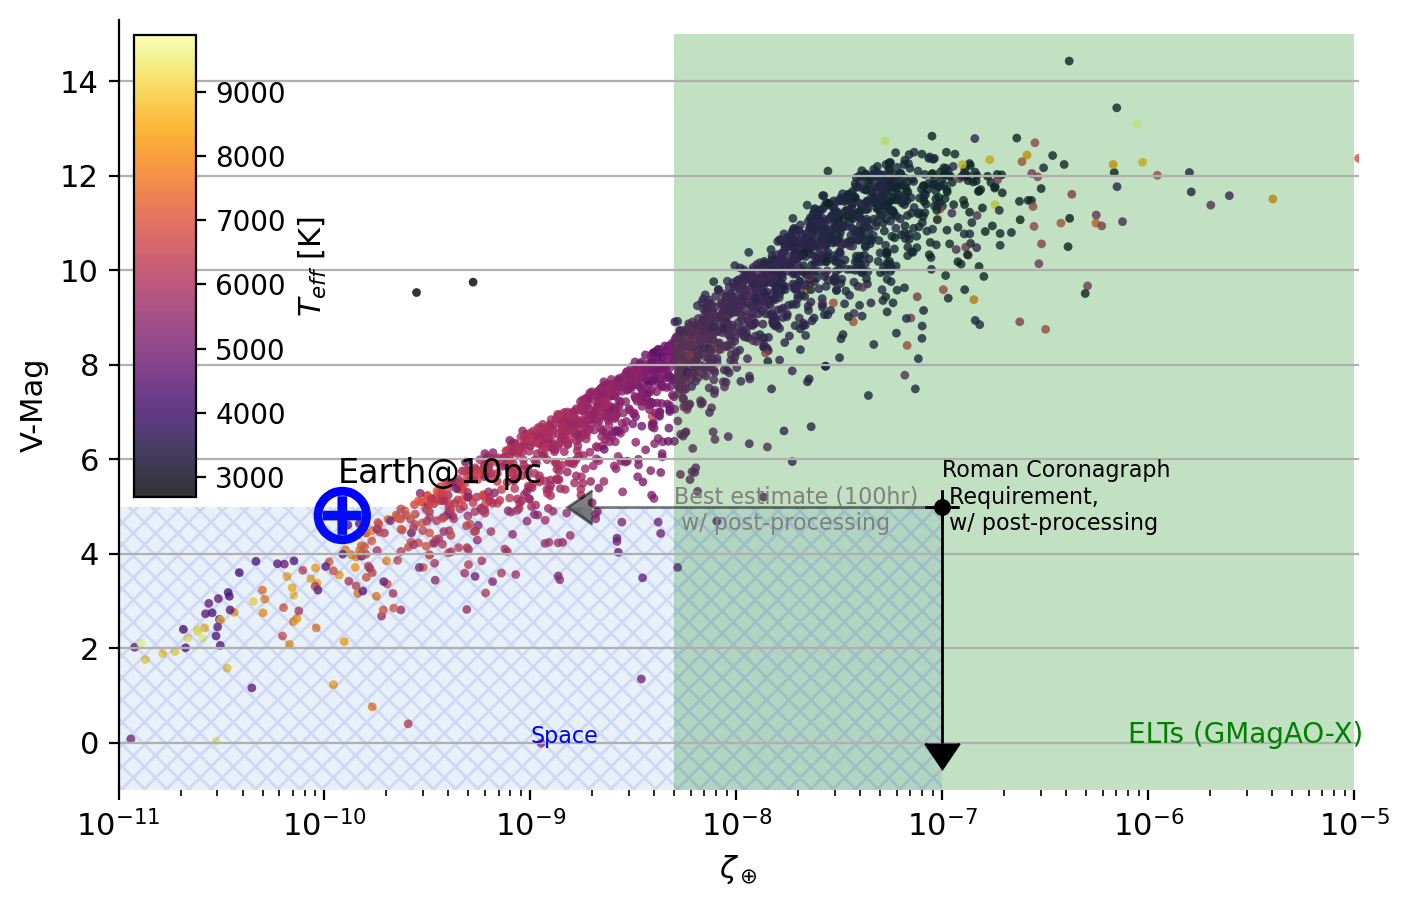

In [20]:
sel=exoarch_mission["st_eeidmas"] 
from matplotlib.patches import Rectangle
plt.rcParams["font.size"]=11

Vrecon=recons2012[ 'V'][np.isfinite(recons2012[ 'V'])]
V_exocat=exocat_stars["st_vmag"][np.isfinite(exocat_stars["st_vmag"])]
V_mission=mission_stars["st_vmag"][np.isfinite(mission_stars["st_vmag"])]

#grid=plt.jointplot(exoarch_mission["st_vmag"][sel],exoarch_mission["st_eeidmas"][sel],alpha=.3)#,linewidth=3)
#ax=grid.ax_joint
a=exocat_stars["st_eeidmas"]*exocat_stars["st_dist"]/(206265*1000)*(1.0*u.parsec).to(u.astronomical_unit)
C=(rp.to(u.astronomical_unit).value/a)**2
a_mision=exoarch_mission["st_eeidmas"]*exoarch_mission["st_dist"]/(206265*1000)*(1.0*u.parsec).to(u.astronomical_unit)
C_mission=(rp.to(u.astronomical_unit).value/a_mision)**2

plt.figure(figsize=[8,5],dpi=200)
ax=plt.subplot(111)

sel=exocat_stars["st_teff"]<10000
sel_exomission=exoarch_mission["st_teff"]<10000


scat=ax.scatter(C[sel],exocat_stars["st_vmag"][:][sel],c=np.array(exocat_stars["st_teff"])[sel],
                cmap=plt.cm.inferno,
                alpha=0.8,
                linewidth=0,
                s=10,
          label=" Stars' Earth-Equivalent Insolation")#,linewidth=3)
          #,linewidth=3)
'''scat_mission=ax.scatter(C_mission[sel_exomission],exoarch_mission["st_vmag"][:][sel_exomission],
                     #   c=np.array(exoarch_mission["st_teff"])[sel_exomission],
                cmap=plt.cm.plasma,
                alpha=0.6,
                s=10,
                marker="o",
                        facecolors='none', 
                         edgecolors='black',
          label=" Stars' Earth-Equivalent Insolation")#,linewidth=3)
          #,linewidth=3)
          '''
ax.set_xlabel(r"$\zeta_\oplus$")
ax.set_xscale("log")
ax.set_xlim(1e-11,C[sel].max())
#ax.set_yticks([1,2, 3,4, 5,6,7,8,9])



ax.set_ylabel("V-Mag")
ains = inset_axes(plt.gca(), width='5%', height='60%', loc=2)
ax.set_ylim([-1,15.3])
#ax.set_ylabel(r"$m_{\rmV}$")
cb=plt.colorbar(scat,orientation="vertical",cax=ains,label=r"$T_{eff}$ [K]")
cb.ax.tick_params(labelsize=10)
#cb.set_ticklabels(np.round(10**(cb.get_ticks())))

ax.scatter(C_earth.decompose(),4.83,s=500,color='blue',marker='$\oplus$')
ax.text(C_earth.decompose(),5.5, "Earth@10pc", fontsize=12)
#plt.scatter?


ax.grid(axis="y")

plt.subplots_adjust(wspace=0, hspace=0)


import inspect

import matplotlib.pyplot as plt

import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms



#plt.tight_layout()

turn_off_axes=["top","bottom","right",]
for spine in turn_off_axes:
    ax.spines[spine].set_visible(False)
    ax.spines[spine].set_visible(False)
    #ax_twin.spines[spine].set_visible(False)
    #ax1_twin_top.spines[spine].set_visible(False)

ax.errorbar([1e-7], [5], yerr=[[5],[0]],xerr=[[0],[0]],
            marker=".",markersize=10,capsize=6,capthick=1,linewidth=1,color="black",
            uplims=True, 
           )
ax.errorbar([1e-7], [5], yerr=[[0],[0]],xerr=[[9.8e-8],[0]],
            marker=".",markersize=10,capsize=6,capthick=1,linewidth=1,color="black",
           xuplims=True,alpha=.5
           )
ax.text(1e-7, 4.5, "Roman Coronagraph\n Requirement, \n w/ post-processing", fontsize=8)
ax.text(.5e-8, 4.5, "Best estimate (100hr)\n w/ post-processing", fontsize=8,color="gray")
ax.text(8e-7, 0, "ELTs (GMagAO-X)", fontsize=10,color="green")

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1e-8, 7), 1e-1, 9, facecolor="grey"))
ax.fill_between([5e-9,1e-5],[-1,-1],
                 y2=15,
                color='green',
                 alpha=.24,
                 #facecolors=None,
                 linewidth=0,
                 #hatch="XXX",
                 edgecolor="g",)
    
ax.fill_between([1e-11,1e-7],[-1,-1],
                 y2=5,
                color='blue',
                 alpha=.1,
                 facecolors=None,
                 linewidth=0,
                hatch="XXX",
                # edgecolor="blue",
               )
ax.text(1e-9, 0, "Space", fontsize=8,color="blue")
#ax1.legend(loc="lower right",fontsize=9)
plt.savefig("vmag_vs_V_cumulative.pdf",bbox_inches="tight")

/var/folders/xh/7td0g7f54j7cfsb7f561s_4h0000gn/T/ipykernel_98258/1931908489.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scat_mission=ax.scatter(exocat_stars["st_eeidmas"][:][sel_exomission],C[sel_exomission],
/var/folders/xh/7td0g7f54j7cfsb7f561s_4h0000gn/T/ipykernel_98258/1931908489.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([-1,1e-5])


NameError: name 'ax1' is not defined

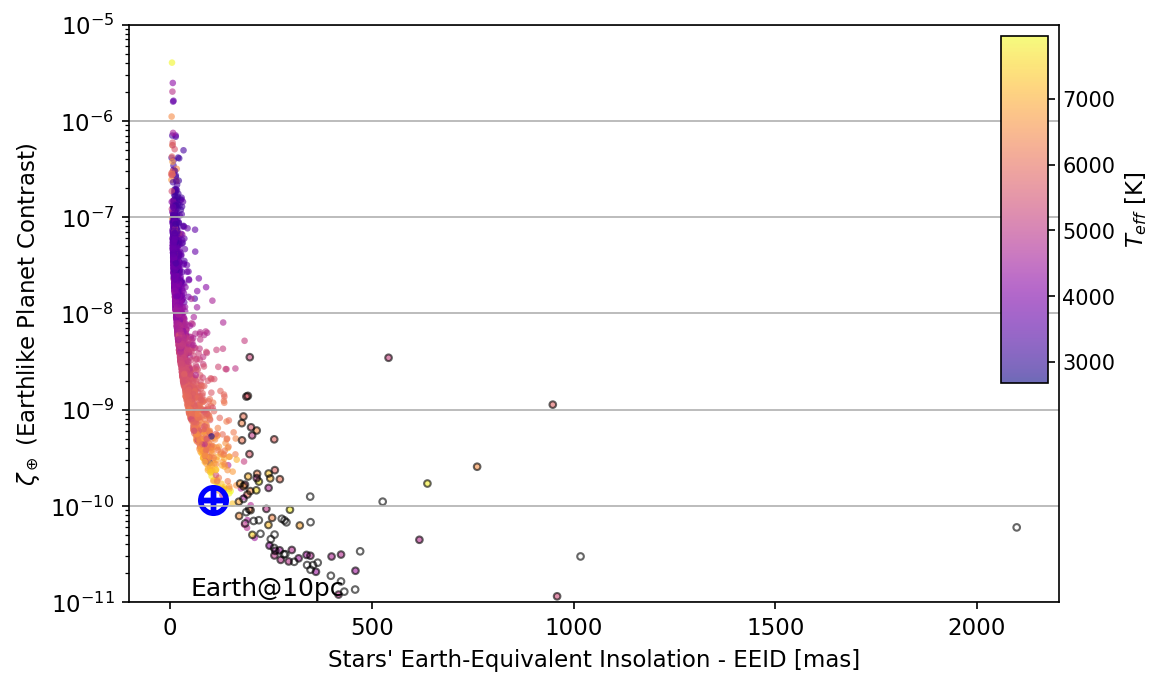

In [11]:
sel=exoarch_mission["st_eeidmas"] 
from matplotlib.patches import Rectangle
plt.rcParams["font.size"]=11

Vrecon=recons2012[ 'V'][np.isfinite(recons2012[ 'V'])]
V_exocat=exocat_stars["st_vmag"][np.isfinite(exocat_stars["st_vmag"])]
V_mission=mission_stars["st_vmag"][np.isfinite(mission_stars["st_vmag"])]

#grid=plt.jointplot(exoarch_mission["st_vmag"][sel],exoarch_mission["st_eeidmas"][sel],alpha=.3)#,linewidth=3)
#ax=grid.ax_joint
a=exocat_stars["st_eeidmas"]*exocat_stars["st_dist"]/(206265*1000)*(1.0*u.parsec).to(u.astronomical_unit)
C=(rp.to(u.astronomical_unit).value/a)**2
a_mision=exoarch_mission["st_eeidmas"]*exoarch_mission["st_dist"]/(206265*1000)*(1.0*u.parsec).to(u.astronomical_unit)
C_mission=(rp.to(u.astronomical_unit).value/a_mision)**2

plt.figure(figsize=[8,5],dpi=150)
ax=plt.subplot(111)

sel=exocat_stars["st_teff"]<8000
Space_lim_mag=3.7
sel_exomission=exocat_stars["st_vmag"]<Space_lim_mag


scat=ax.scatter(exocat_stars["st_eeidmas"][:][sel],C[sel],c=np.array(exocat_stars["st_teff"])[sel],
                cmap=plt.cm.plasma,
                alpha=0.6,
                linewidth=0,
                s=10,
          label=" Stars' Earth-Equivalent Insolation")#,linewidth=3)
          #,linewidth=3)
scat_mission=ax.scatter(exocat_stars["st_eeidmas"][:][sel_exomission],C[sel_exomission],
                     #   c=np.array(exoarch_mission["st_teff"])[sel_exomission],
                cmap=plt.cm.plasma,
                alpha=0.6,
                s=10,
                marker="o",
                        facecolors='none', 
                         edgecolors='black',
          label=" Stars' Earth-Equivalent Insolation")#,linewidth=3)
          #,linewidth=3)
          
ax.set_ylabel(r"$\zeta_\oplus$ (Earthlike Planet Contrast)")
ax.set_yscale("log")
ax.set_ylim(1e-11,1e-5)
#ax.set_yticks([1,2, 3,4, 5,6,7,8,9])



ax.set_xlabel("Stars' Earth-Equivalent Insolation - EEID [mas]")
ains = inset_axes(plt.gca(), width='5%', height='60%', loc=1)
ax.set_ylim([-1,1e-5])
#ax.set_ylabel(r"$m_{\rmV}$")
cb=plt.colorbar(scat,orientation="vertical",cax=ains,label=r"$T_{eff}$ [K]",)
cb.ax.tick_params(labelsize=10)
#cb.set_ticklabels(np.round(10**(cb.get_ticks())))

ax.scatter(100,C_earth.decompose(),s=250,color='blue',marker='$\oplus$')
ax.text(50,C_earth.decompose()*.1, "Earth@10pc", fontsize=12)
#plt.scatter?


ax.grid(axis="y")

plt.subplots_adjust(wspace=0, hspace=0)


import inspect

import matplotlib.pyplot as plt

import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch
import matplotlib.transforms as mtransforms



#plt.tight_layout()

turn_off_axes=["top","bottom","right",]
for spine in turn_off_axes:
    ax1.spines[spine].set_visible(False)
    ax.spines[spine].set_visible(False)
    ax1_twin.spines[spine].set_visible(False)
    #ax1_twin_top.spines[spine].set_visible(False)

ax.text(50,1e-8, "ELT target (GMagAO-X)", fontsize=10,color="green",weight='bold',)
ax.text(50,1e-7, "ELT requirement (GMagAO-X)", fontsize=10,color="green")
ax.text(20,1e-9, "ELT Goal (GMagAO-X)", fontsize=10,color="green")

currentAxis = plt.gca()
ax.fill_between([10,1e3],[1e-8,1e-8],
                 y2=1e-5,
                color='green',
                 alpha=.05,
                 #facecolors=None,
                 linewidth=0,
                 hatch="XXX",
                 edgecolor="g",)
ax.fill_between([10,1e3],[1e-9,1e-9],
                 y2=1e-5,
                color='green',
                 alpha=.05,
                 #facecolors=None,
                 linewidth=0,
                 hatch="XXX",
                 edgecolor="g",)    
ax.text(450,1e-9, "Space target", fontsize=10,color="blue",weight='bold',)
ax.text(450,1e-8, "Space requirement", fontsize=10,color="blue")
ax.text(400,1e-10, "Space Goal", fontsize=10,color="blue")
ax.text(300,1e-6, r"o $\rightarrow$ V$<$%1.1f"%Space_lim_mag, fontsize=10,color="black")

currentAxis = plt.gca()
ax.fill_between([150,2e3],[1e-9,1e-9],
                 y2=1e-5,
                color='blue',
                 alpha=.24,
                 #facecolors=None,
                 linewidth=0,
                 #hatch="XXX",
                 edgecolor="g",)
ax.fill_between([150,2e3],[1e-10,1e-10],
                 y2=1e-5,
                color='blue',
                 alpha=.1,
                 #facecolors=None,
                 linewidth=0,
                 #hatch="XXX",
                 edgecolor="g",)
       
    
ax.set_xscale("log")
ax1.legend(loc="upper right",fontsize=9)

plt.savefig("v_vs_eeid.png",bbox_inches="tight")

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")
plt.figure(figsize=[6,4],dpi=400)
#ax=plt.subplot(111)



g = sns.JointGrid(x=exocat_stars["st_eeidmas"][sel].data.data/1e3,
              y=exocat_stars["st_dist"][:][sel].data.data,marginal_ticks=True)
g.plot_joint(sns.scatterplot,
             hue=exocat_stars["st_vmag"][:][sel],
                 palette="plasma_r",
                alpha=.5)
g.plot_marginals(sns.histplot)

g.ax_joint.set_xscale('log')
wav_as=2.4*500e-9*206265


g.ax_joint.plot([wav_as/2.5,wav_as/2.5],[-1,30],color="black")

g.ax_joint.text(wav_as/2.5,-1," 2.5m",size=14,color="black")

g.ax_joint.plot([wav_as/25,wav_as/25],[-1,30],color="green")
g.ax_joint.text(wav_as/25,-1," 25m",size=14,color="green")

g.ax_joint.plot([wav_as/6.5,wav_as/6.5],[-1,30],color="gray")
g.ax_joint.text(wav_as/6.5,-1," 6.5m",size=14,color="gray")

g.ax_joint.plot([wav_as/12,wav_as/12],[-1,30],color="teal")
g.ax_joint.text(wav_as/12,-1,"12m",size=14,color="teal")


g.ax_joint.plot([wav_as/1,wav_as/1],[-1,30],color="blue")
g.ax_joint.text(wav_as/1,-1," 1m",size=14,color="blue")





g.ax_joint.scatter(0.038,1.28,s=500,color='blue',marker='.',alpha=.7)

g.ax_joint.scatter(184.44/1000.2,3.2,s=500,color='red',marker='x',alpha=.7)


g.ax_joint.text(0.038,1.28,"Proxima",color='blue',alpha=.5,size=20)

g.ax_joint.text(184.44/1000.2,3.2,r"$\epsilon$ Eri", color='red',alpha=.5,size=20)





g.ax_joint.set_xlabel("Separation of Earth-Equivalent Irradiance [arcsecond]\n (Hab Zones) ")

g.ax_joint.set_ylabel("Distance [parsec]")

plt.ylim([-2,30])

g.figure.savefig('dVSinsolation.png',dpi=400,bbox_inches="tight")
#plt.savefig("dVSinsolation.png",bbox_inches="tight")